In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Import Datasets

rai_old = pd.read_csv('Dataset/rai_old_share.csv') #Release Assistance Indicator
rai_new = pd.read_csv('Dataset/rai_new_share.csv')
rtt = pd.read_csv('Dataset/rtt_share.csv') #Round Trip Time
psm = pd.read_csv('Dataset/PSM_share.csv') #inactive periods of PTW / DRX or PSM
connected = pd.read_csv('Dataset/connected_share.csv') #device waits duration of inactivity timer before going IDLE
idrx_on = pd.read_csv('Dataset/IDRX_ON_share.csv') #listen for paging occasions during IDLE mode DRX.
rai = rai_new.append(rai_old, ignore_index=True)

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2722: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(rai.columns)
print(idrx_on.columns)
print(rtt.columns)
print(psm.columns)
print(connected.columns)

Index(['measurement_id', 'con_idle_stateNumber', 'state', 'energyConsumption',
       'ms', 'tx_power_median', 'current_max', 'rssi_median', 'rtt_median',
       'rsrp_median', 'ECL_median', 'code', 'Location Coverage',
       'ExpectedResponse', 'timestampUETransmission', 'timestampServerCapture',
       'failure_direction', 'energyConsumptionTx', 'msTx', 'date', 'duration',
       'module', 'operator', 'interval', 'psize', 'site', 'active_timer',
       'tau', 'note', 'operator_humanReadable', 'Packet Size [Bytes]',
       'Throughput'],
      dtype='object')
Index(['measurement_id', 'con_idle_stateNumber', 'state', 'energyConsumption',
       'ms', 'current_max', 'snr_mostCommon', 'ECL_mostCommon',
       'rsrp_mostCommon', 'rsrq_mostCommon', 'Location Coverage', 'date',
       'duration', 'module', 'operator', 'interval', 'psize', 'site',
       'active_timer', 'tau', 'note', 'operator_humanReadable'],
      dtype='object')
Index(['measurement_id', 'con_idle_stateNumber', 'rtt', 'E

In [4]:
idrx_on = idrx_on.rename(columns={'ECL_mostCommon':'ECL_median'})

In [5]:
#First Dataset Columns
#Merge Common Columns to obtain Dataset
print('Before Merge: ',connected.shape,idrx_on.shape,rai.shape)
data_no_tx = pd.concat([connected,idrx_on,rai], join = 'inner', ignore_index=True)
data_no_tx.drop(columns=['current_max','measurement_id','con_idle_stateNumber','state','module','operator','note','operator_humanReadable','site','date'],inplace=True,axis=0)
print('After Merge: ',data_no_tx.columns, data_no_tx.shape)


#Second Dataset Columns
#Merge Common Columns to obtain Dataset
print('Before Merge: ',connected.shape,rai.shape)
data_tx = pd.concat([connected,rai], join = 'inner', ignore_index=True)
data_tx.drop(columns=['measurement_id','Packet Size [Bytes]','rsrp_median','current_max','rssi_median','rtt_median','ExpectedResponse','con_idle_stateNumber','state','module','operator','note','operator_humanReadable','site','date','timestampUETransmission', 'timestampServerCapture','failure_direction'],inplace=True,axis=0)
print('After Merge: ',data_tx.columns, data_tx.shape)


Before Merge:  (6013, 31) (52764, 22) (2515, 32)
After Merge:  Index(['energyConsumption', 'ms', 'ECL_median', 'Location Coverage',
       'duration', 'interval', 'psize', 'active_timer', 'tau'],
      dtype='object') (61292, 9)
Before Merge:  (6013, 31) (2515, 32)
After Merge:  Index(['energyConsumption', 'ms', 'tx_power_median', 'ECL_median',
       'Location Coverage', 'energyConsumptionTx', 'msTx', 'duration',
       'interval', 'psize', 'active_timer', 'tau', 'Throughput'],
      dtype='object') (8528, 13)


In [6]:
#Change Location Coverage to Numeric Values

Location_map = {"Good":1,"Okay":0,"Bad":-1}

data_tx['Location Coverage'] = data_tx['Location Coverage'].map(Location_map).fillna(0)
data_no_tx['Location Coverage'] = data_no_tx['Location Coverage'].map(Location_map).fillna(0)


#Remove NaN Values (TEMP)
data_no_tx.dropna(axis=0,how='any',inplace=True)
data_tx.dropna(axis=0,how='any',inplace=True)

print(data_no_tx.shape,data_tx.shape)

#Clean Active_Timer Values

data_tx['active_timer'] = data_tx['active_timer'].astype(int)
data_no_tx['active_timer'] = data_no_tx['active_timer'].astype(int)

(9737, 9) (687, 13)


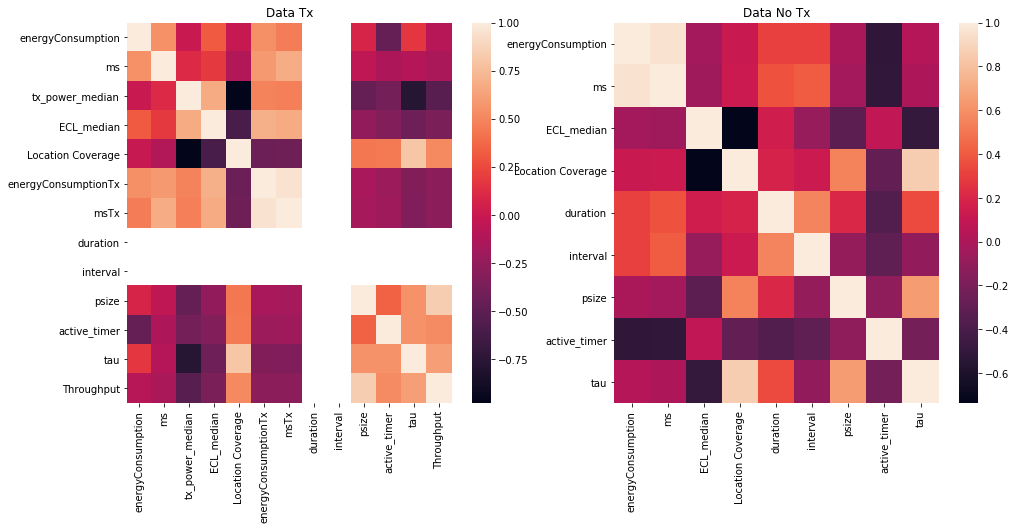

In [7]:
#Visualise Data

#Heat Maps
plt.figure(1,figsize=(16,7))
plt.subplot(1,2,1)
plt.title('Data Tx')
sns.heatmap(data_tx.corr())

plt.subplot(1,2,2)
plt.title('Data No Tx')
sns.heatmap(data_no_tx.corr())

plt.show()

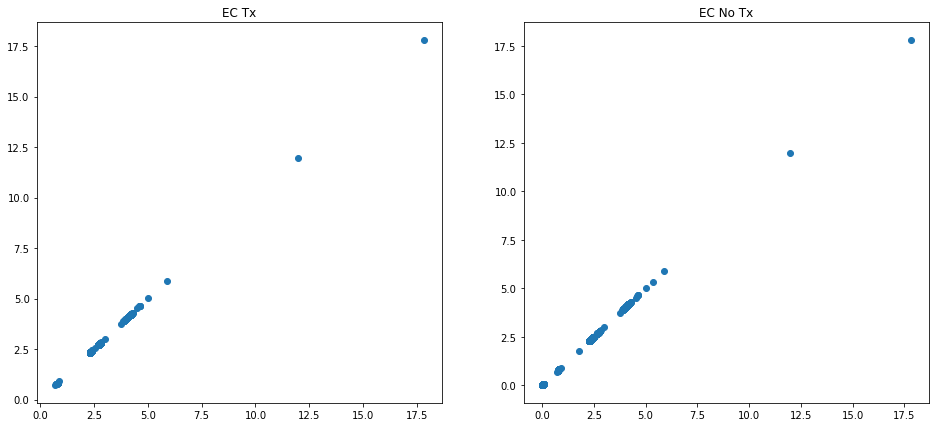

In [8]:
# Visualise energyConsumption

plt.figure(1,figsize=(16,7))
plt.subplot(1,2,1)
plt.scatter(data_tx['energyConsumption'],data_tx['energyConsumption'])
plt.title('EC Tx')

plt.subplot(1,2,2)
plt.title('EC No Tx')
plt.scatter(data_no_tx['energyConsumption'],data_no_tx['energyConsumption'])
plt.plot()
plt.show()

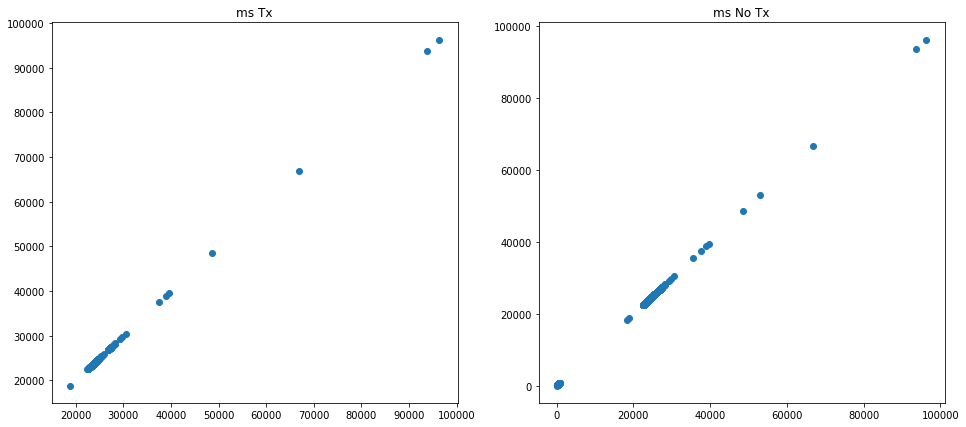

In [9]:
#Visualise MS

plt.figure(1,figsize=(16,7))
plt.subplot(1,2,1)
plt.scatter(data_tx['ms'],data_tx['ms'])
plt.title('ms Tx')

plt.subplot(1,2,2)
plt.scatter(data_no_tx['ms'],data_no_tx['ms'])
plt.title('ms No Tx')
plt.plot()
plt.show()

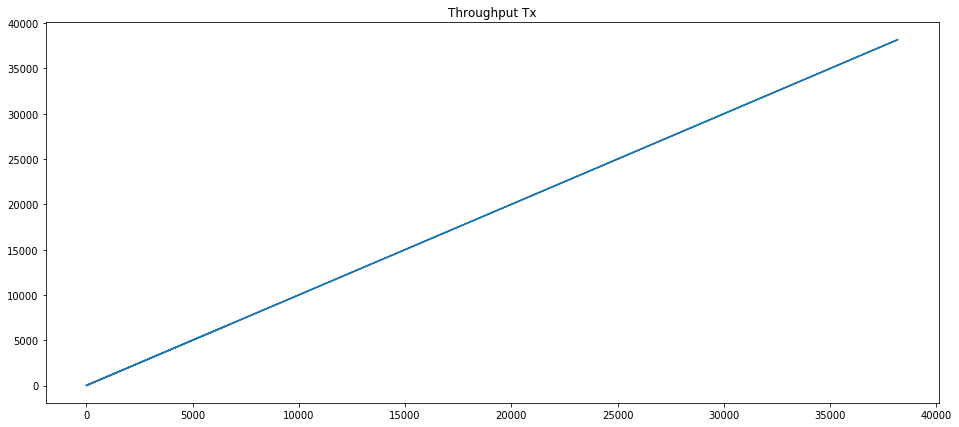

In [10]:
#Visualise Throughput 

plt.figure(1,figsize=(16,7))
plt.title('Throughput Tx')
plt.plot(data_tx['Throughput'],data_tx['Throughput'])
plt.plot()
plt.show()

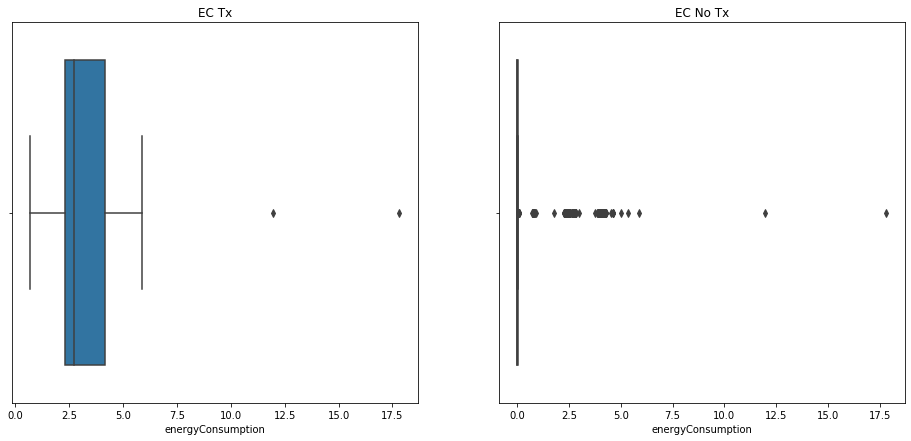

In [11]:
plt.figure(1,figsize=(16,7))
plt.subplot(1,2,1)
plt.title('EC Tx')
sns.boxplot(x=data_tx['energyConsumption'])

plt.subplot(1,2,2)
sns.boxplot(x=data_no_tx['energyConsumption'])
plt.title('EC No Tx')
plt.plot()
plt.show()

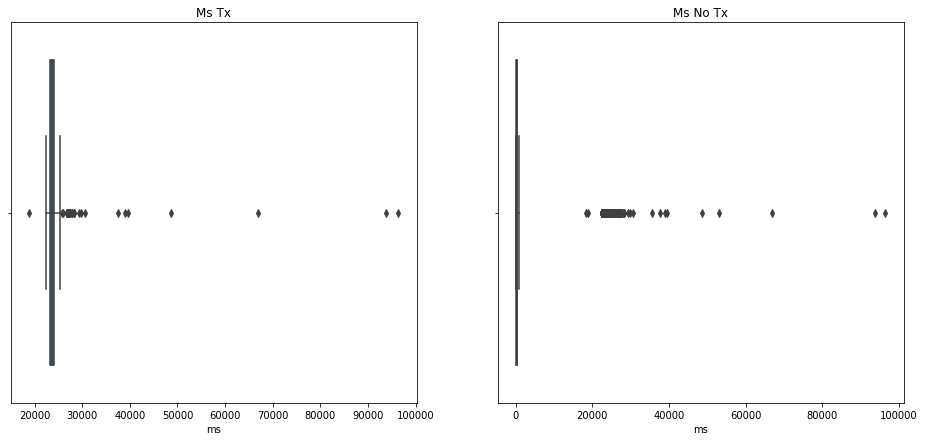

In [12]:
plt.figure(1,figsize=(16,7))
plt.subplot(1,2,1)
plt.title('Ms Tx')
sns.boxplot(x=data_tx['ms'])

plt.subplot(1,2,2)
sns.boxplot(x=data_no_tx['ms'])
plt.title('Ms No Tx')
plt.plot()
plt.show()

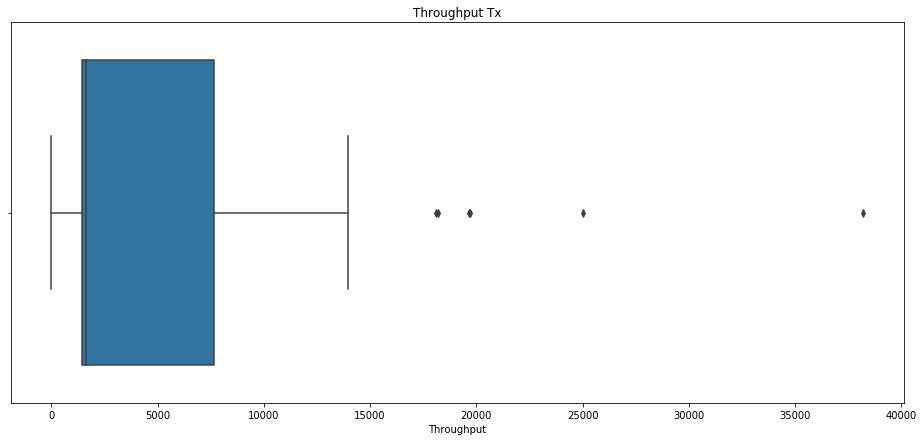

In [13]:
plt.figure(1,figsize=(16,7))
plt.title('Throughput Tx')
sns.boxplot(x=data_tx['Throughput'])
plt.show()

In [14]:
#Z-score to remove detect and remove outliers

print("Tx: ",data_tx.shape,"No Tx: ",data_no_tx.shape)

data_tx_z = np.abs(stats.zscore(data_tx))
print("Z-score for Tx",data_tx_z)

data_no_tx_z = np.abs(stats.zscore(data_no_tx))
print("Z-score for No Tx",data_no_tx_z)

outliers_tx = np.where(data_tx_z > 20)
outliers_no_tx = np.where(data_no_tx_z > 20)

print(len(outliers_tx[1]),len(outliers_no_tx[0]))

for outlier in outliers_tx[0].tolist():
    data_tx = data_tx.iloc[data_tx.index != outlier]

for outlier in outliers_no_tx[0].tolist():
    data_no_tx = data_no_tx.iloc[data_no_tx.index != outlier]


Tx:  (687, 13) No Tx:  (9737, 9)
Z-score for Tx [[9.81417900e-01 6.19938995e-04 5.86701532e-01 ... 7.19847126e-01
  7.68295371e-01 5.60399638e-01]
 [9.77738588e-01 8.03700579e-02 6.42877693e-01 ... 7.19847126e-01
  7.68295371e-01 3.50919956e-01]
 [9.82644337e-01 6.28813419e-02 6.99053854e-01 ... 7.19847126e-01
  7.68295371e-01 2.84923293e-01]
 ...
 [2.01332283e+00 3.15699503e-02 2.55940878e-01 ... 7.21976846e-01
  1.30158275e+00 9.20572213e-01]
 [1.95770391e+00 6.40102175e-02 8.17702484e-01 ... 7.21976846e-01
  1.30158275e+00 8.98872663e-01]
 [2.07503015e+00 1.19008809e+00 2.55940878e-01 ... 7.21976846e-01
  1.30158275e+00 9.89611615e-01]]
Z-score for No Tx [[2.38839167 3.38053429 0.63558206 ... 0.65653975 2.17978751 0.75515415]
 [2.17875407 2.87702759 0.63558206 ... 0.65653975 2.17978751 0.75515415]
 [2.15237974 2.77929893 0.63558206 ... 0.65653975 2.17978751 0.75515415]
 ...
 [0.51033612 2.88365254 0.63558206 ... 0.6078883  2.18245471 0.75742472]
 [0.58054187 2.91890626 0.63558206 ..

/home/psiduck/.local/lib/python3.7/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/usr/lib/python3/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()


In [15]:
data_no_tx.to_csv('Dataset/data_no_tx.csv')
data_tx.to_csv('Dataset/data_tx.csv')

print(data_tx.shape,data_no_tx.shape)

(687, 13) (9737, 9)
